# Importing data

In [51]:
basket_data <- readr::read_csv(
  file = "data/NBA_data.txt"
)

Parsed with column specification:
cols(
  .default = col_double(),
  Name = col_character(),
  Team = col_character(),
  Position = col_character()
)

See spec(...) for full column specifications.



# Some plots before PCA

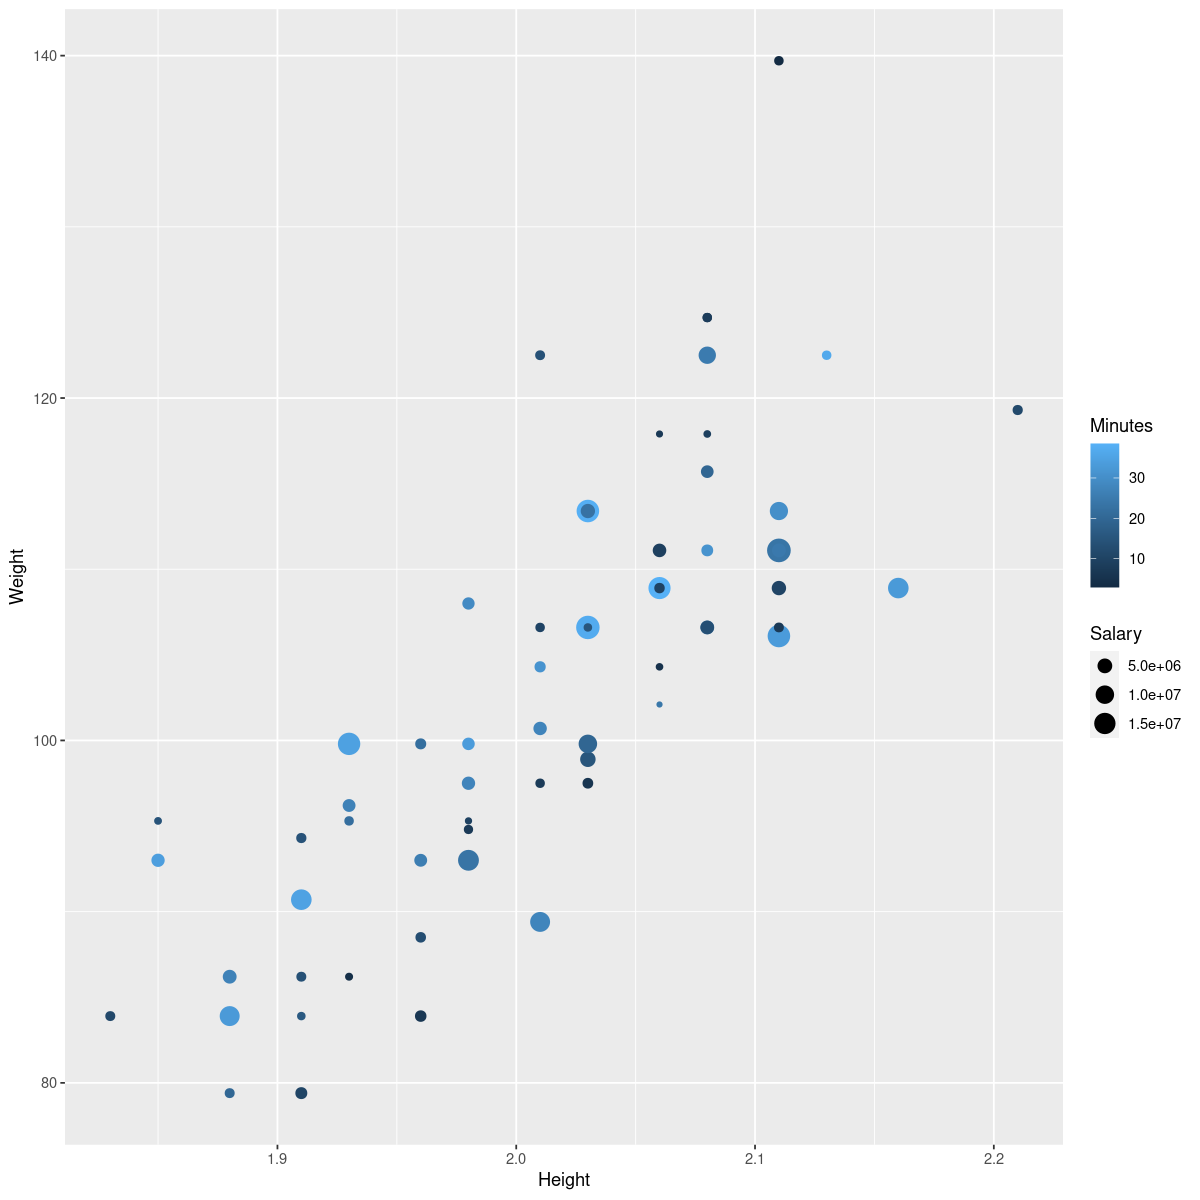

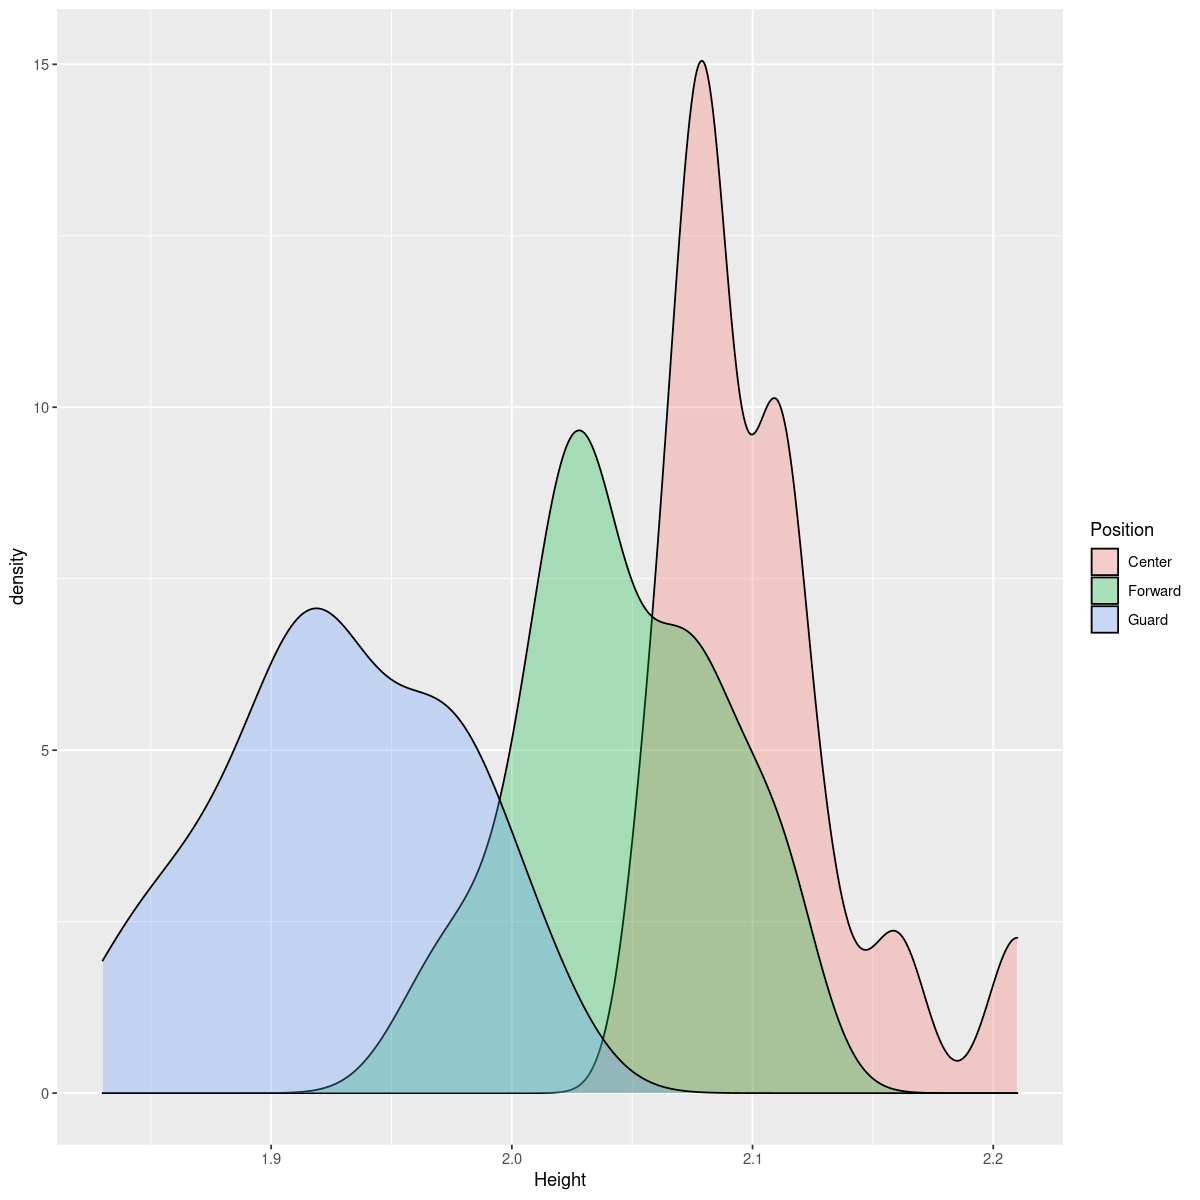

In [34]:
library(ggplot2)
ggplot(data = basket_data, mapping = aes(x = Height, y = Weight, color = Minutes, size = Salary)) + 
geom_point()

ggplot(data = basket_data, mapping = aes(x = Height, fill = Position)) +
  geom_density(color = "black", alpha = 0.3)

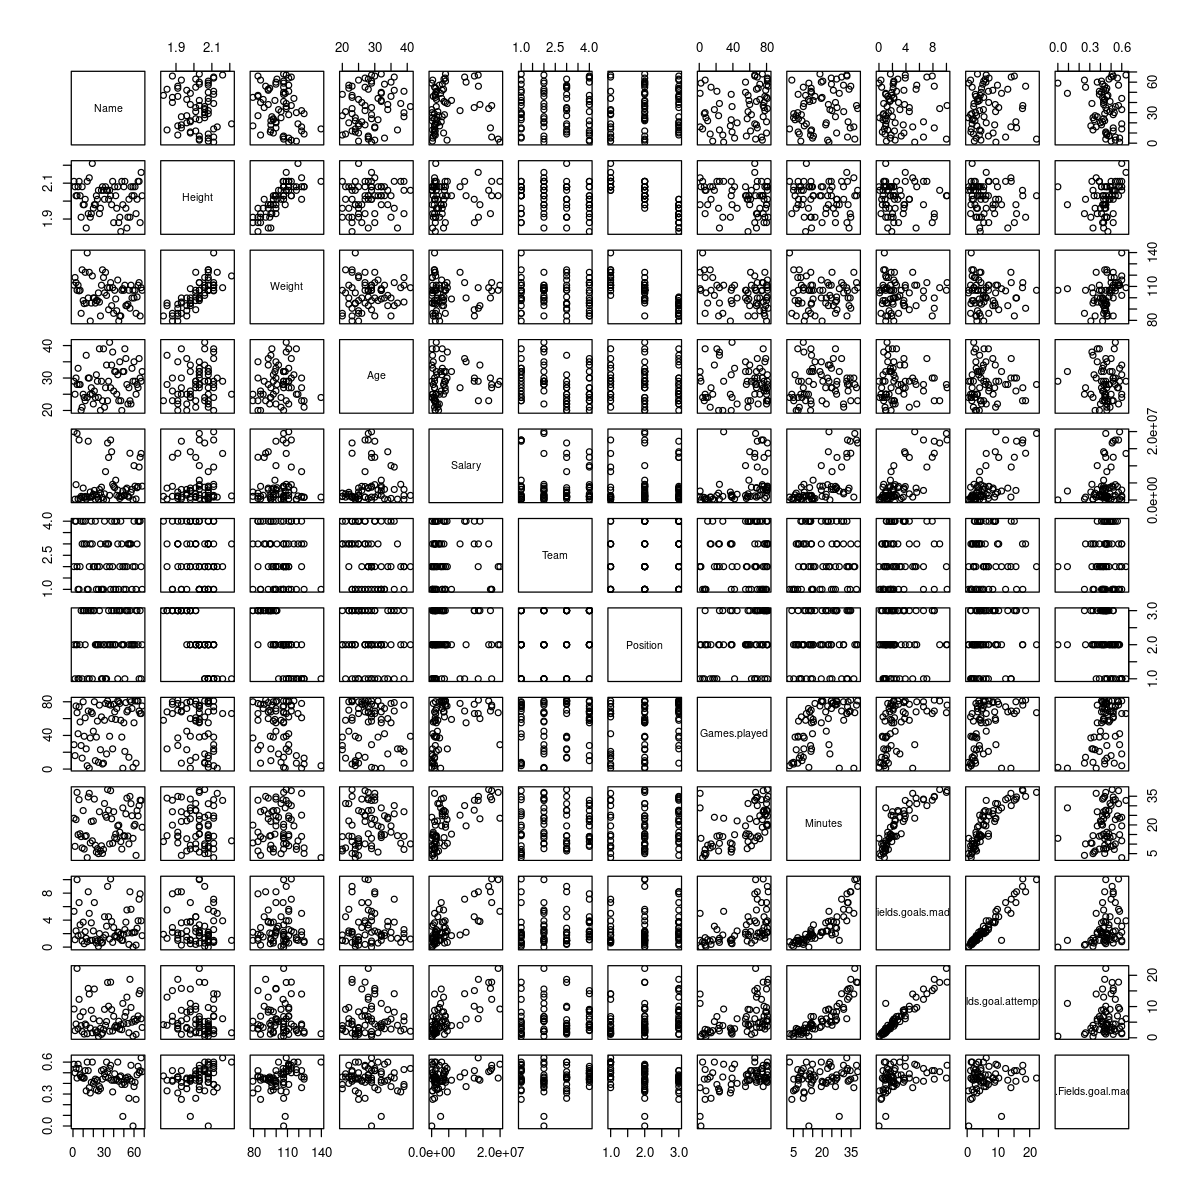

In [35]:
options(repr.plot.width=10, repr.plot.height=10)
graphics::pairs(c(basket_data[,1:12]))

Warning message:
“Setting row names on a tibble is deprecated.”


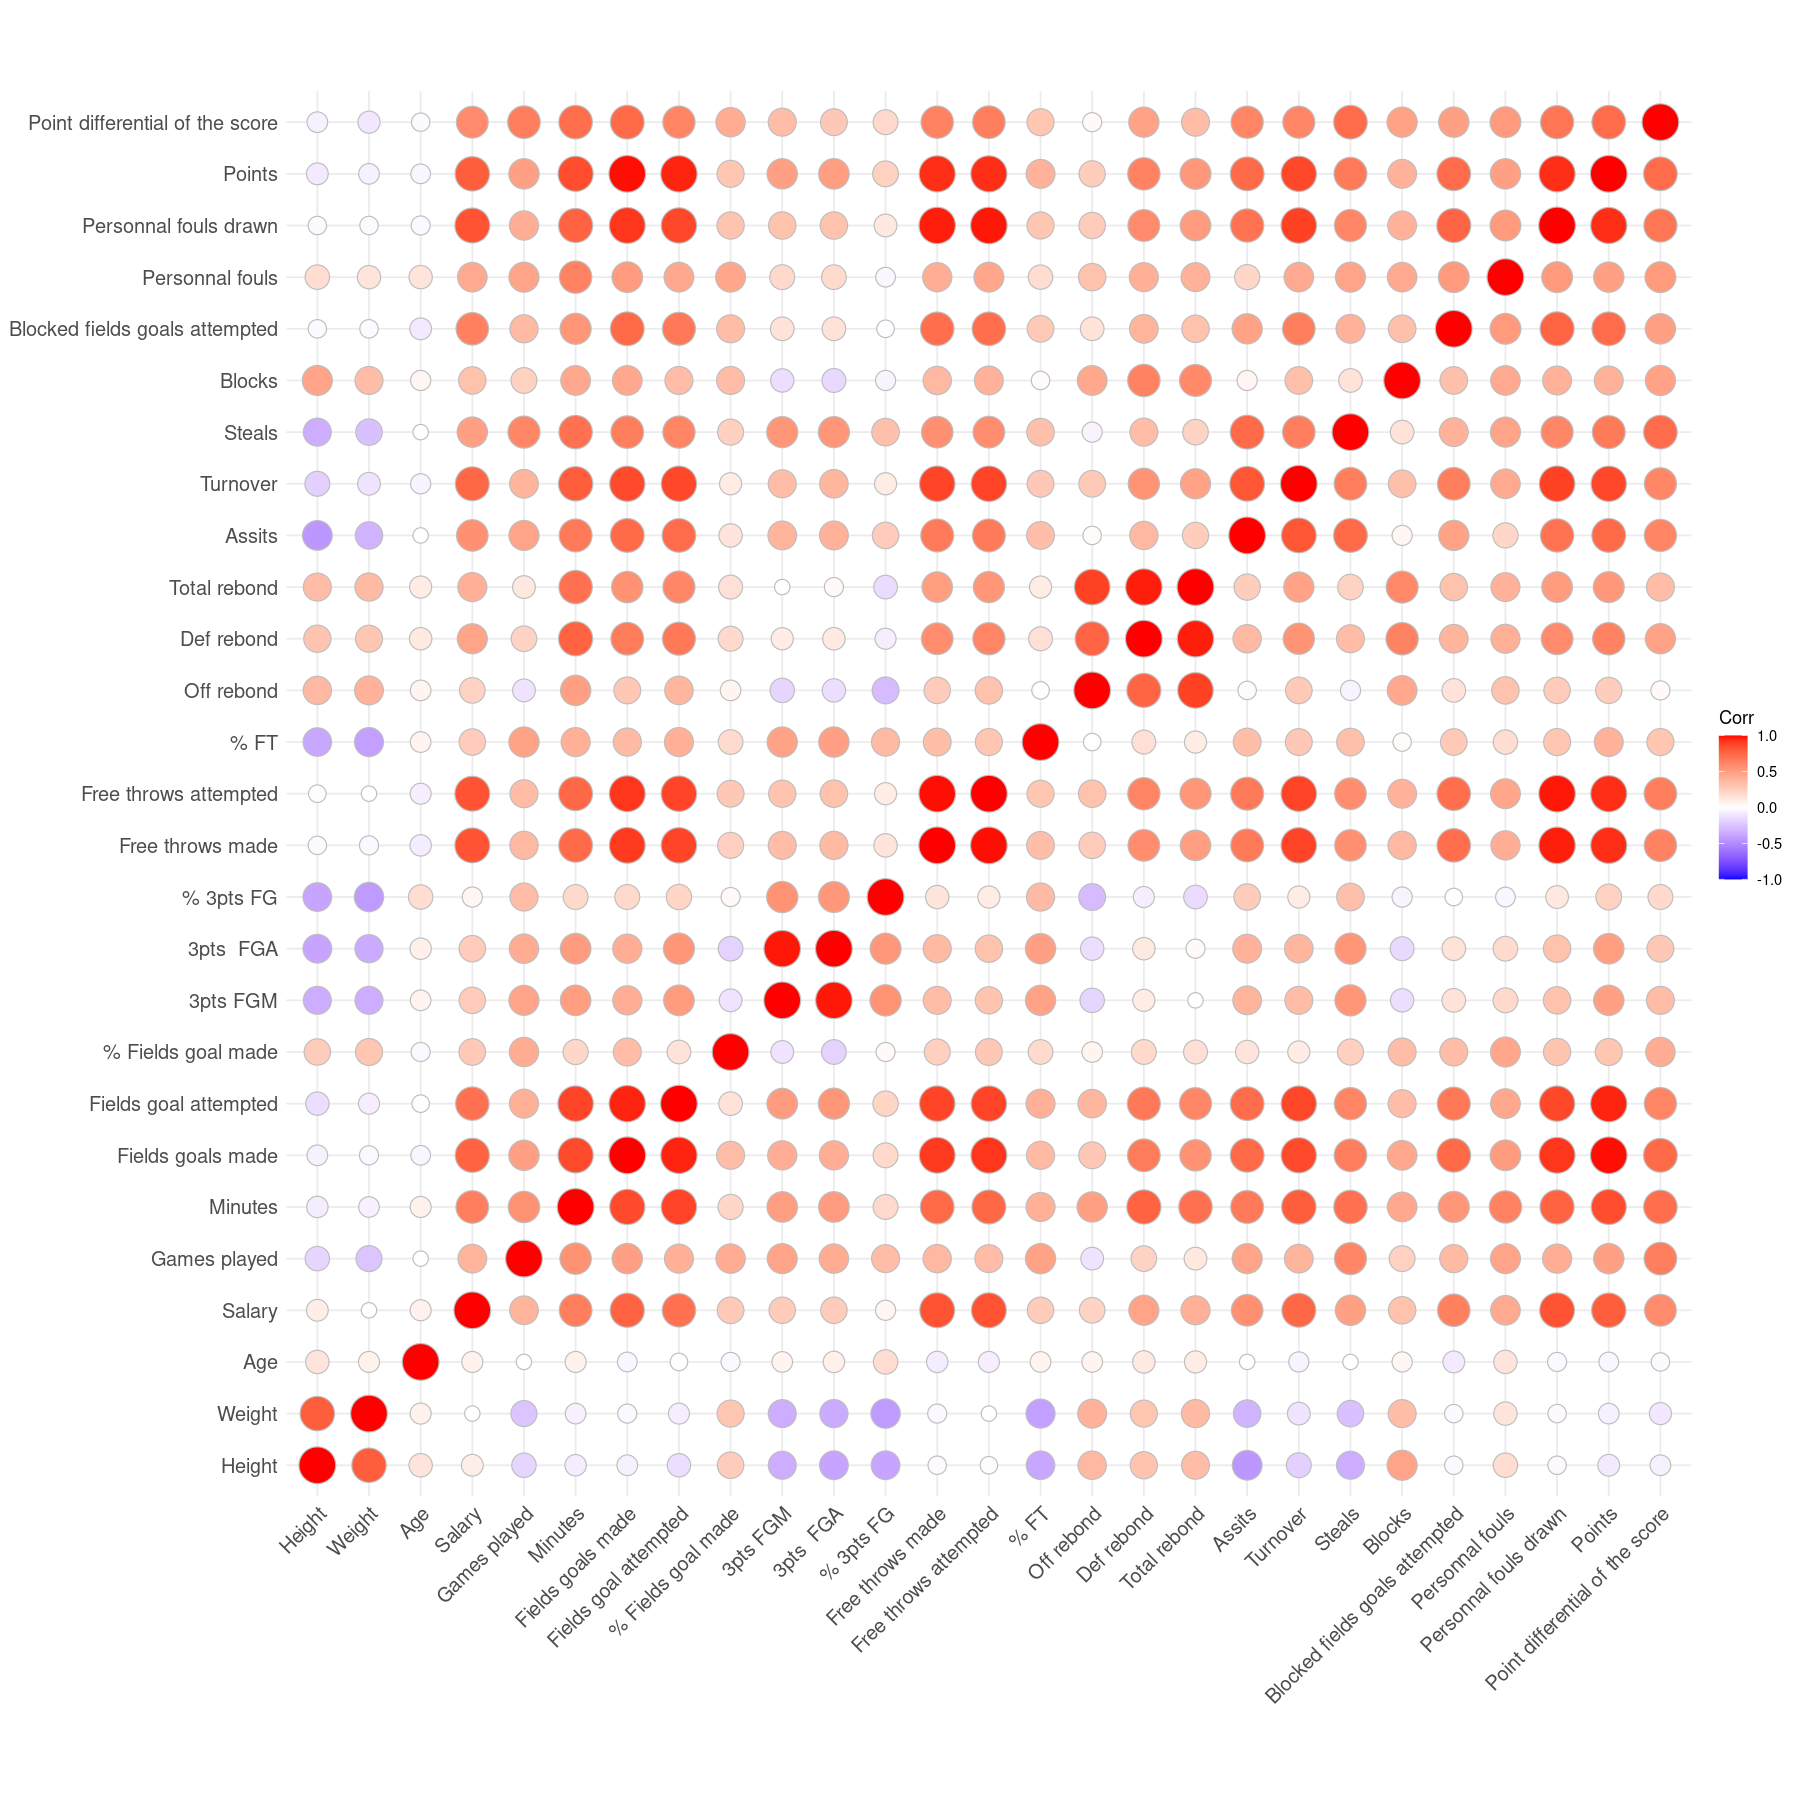

In [37]:
library(dplyr)
#Correlation
options(repr.plot.width=15, repr.plot.height=15)
numBask <- basket_data %>% dplyr::select_if(is.numeric)
rownames(numBask) <- basket_data$Name
corr <- cor(numBask)
ggcorrplot::ggcorrplot(corr, method = "circle")

# PCA

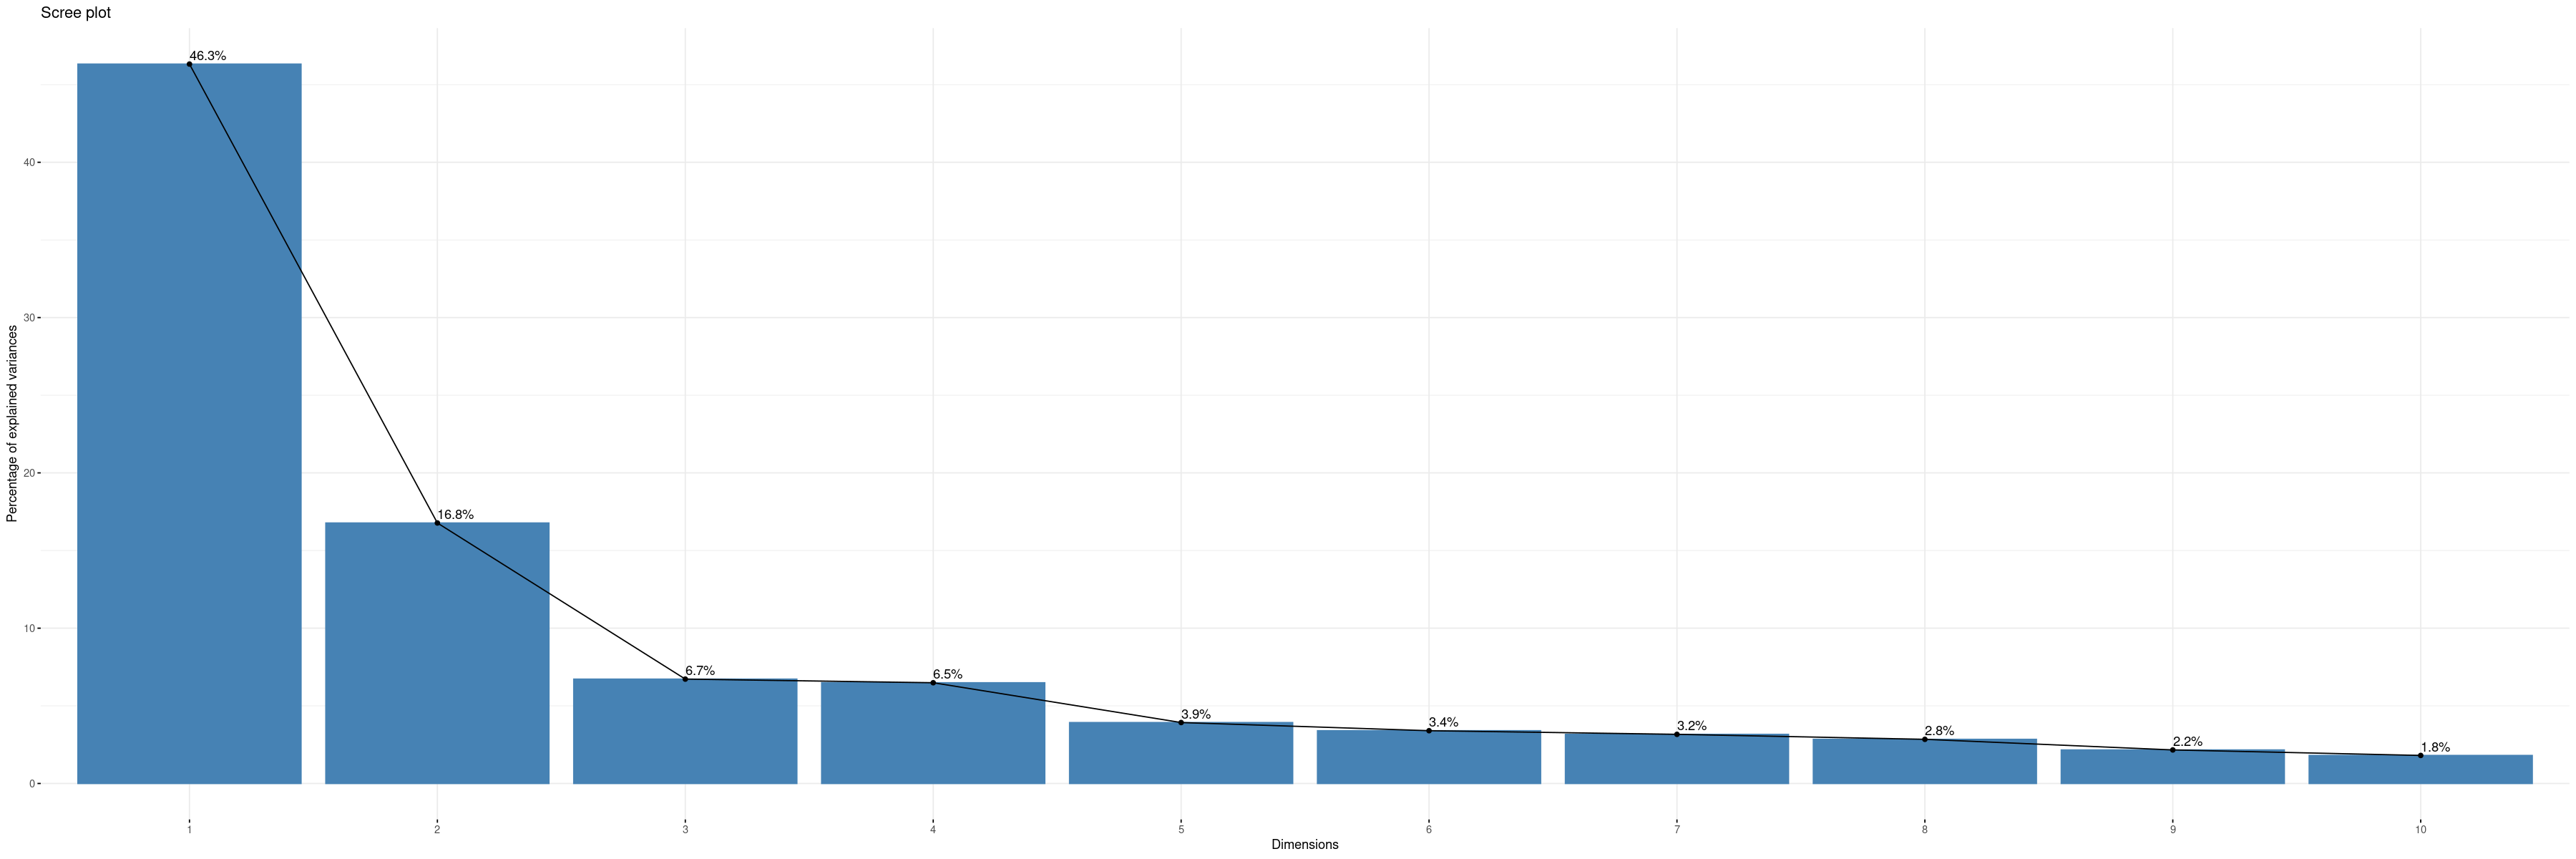

In [38]:
#PCA
options(repr.plot.width=30, repr.plot.height=10)
library(factoextra)
res.pca <- prcomp(numBask, scale = TRUE) 
fviz_eig(res.pca, addlabels = TRUE)

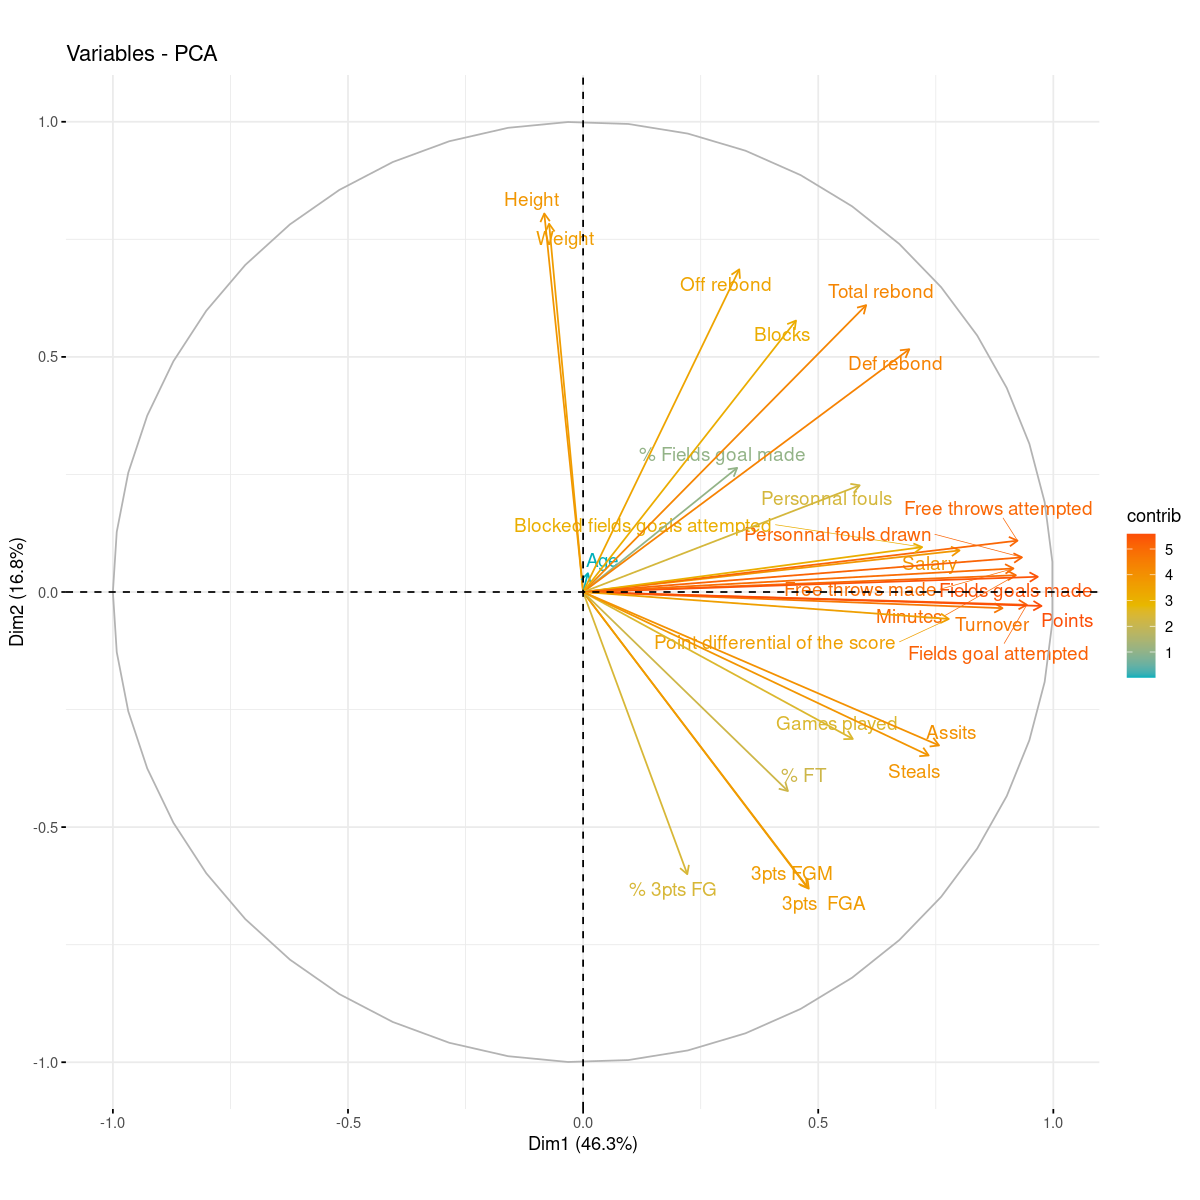

In [39]:
options(repr.plot.width=10, repr.plot.height=10)
#Eigen values
eig.val <- get_eigenvalue(res.pca)

fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

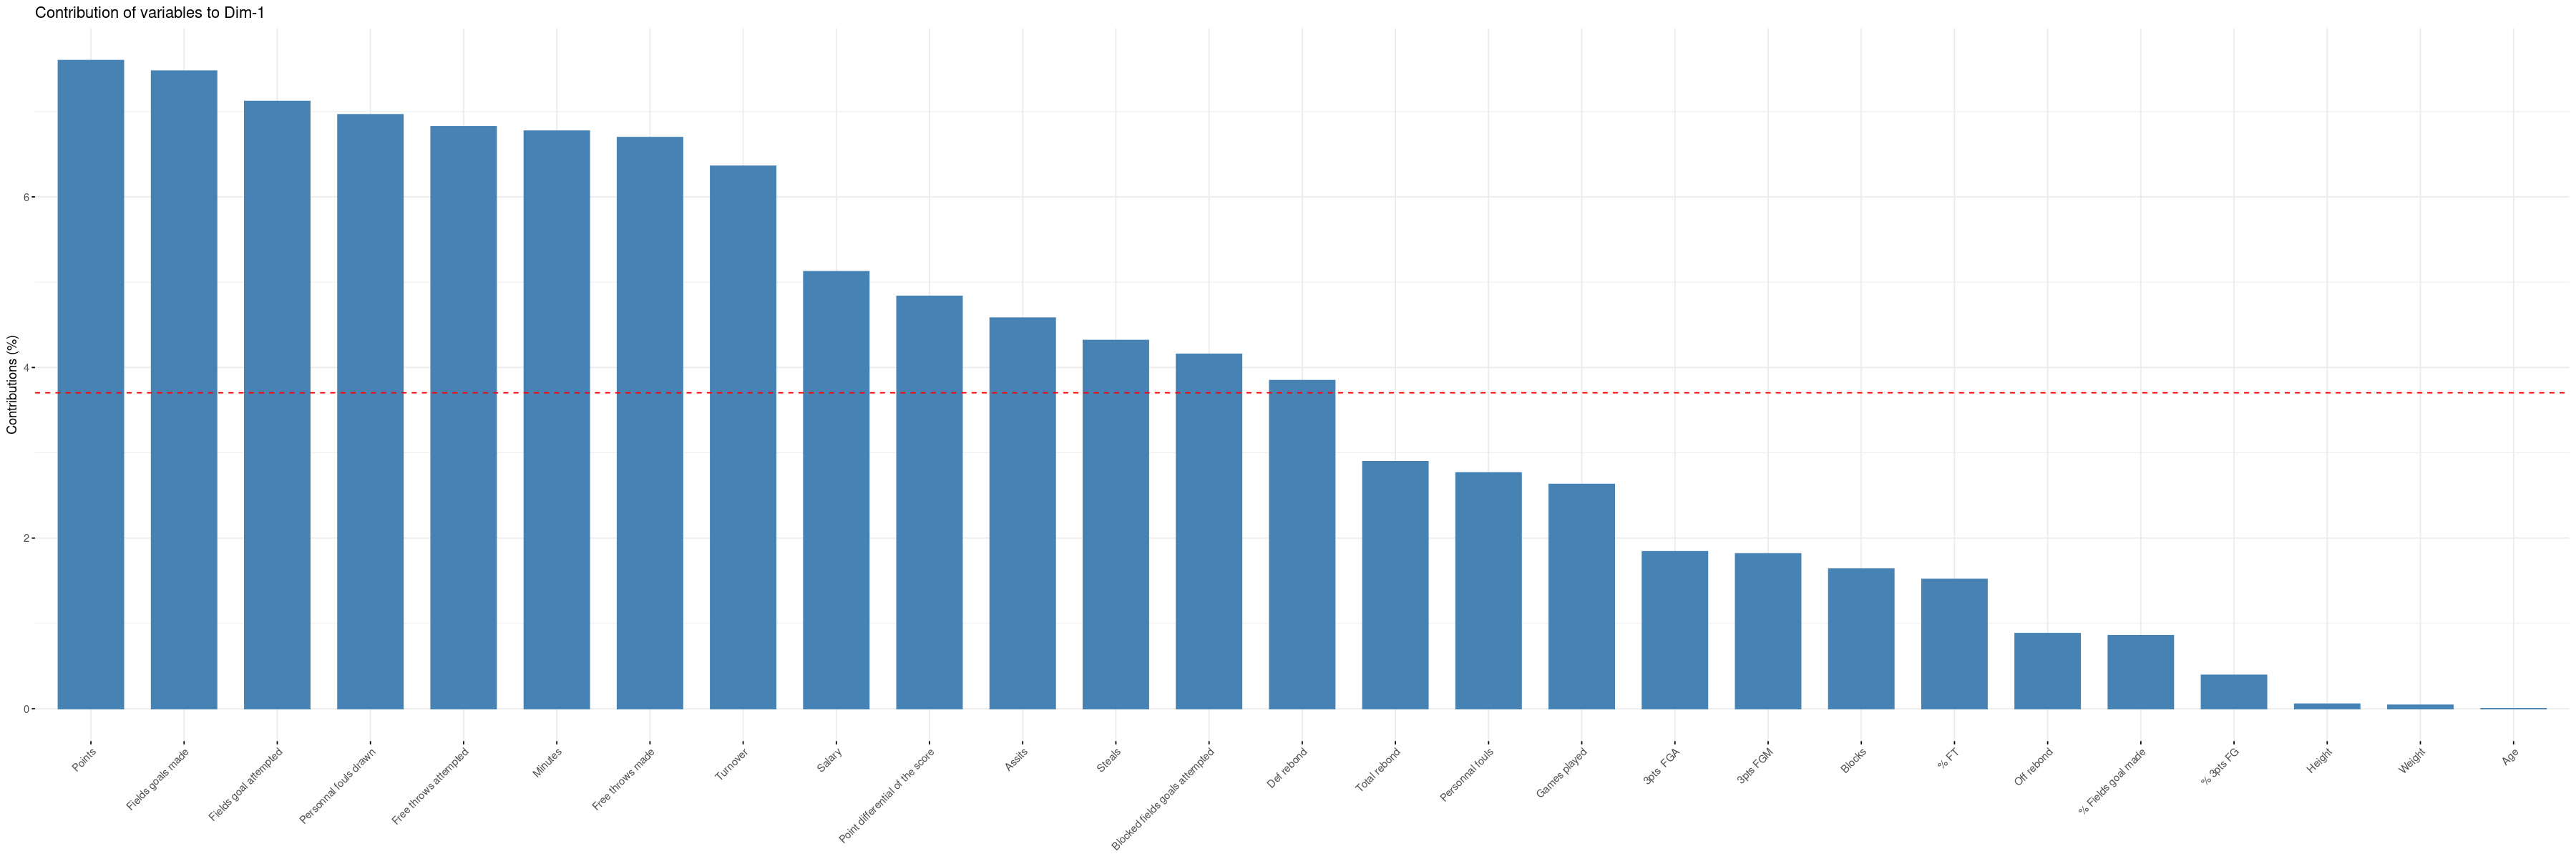

In [40]:
options(repr.plot.width=30, repr.plot.height=10)
fviz_contrib(res.pca, choice = 'var', axes = 1)

res.ind <- get_pca_ind(res.pca)


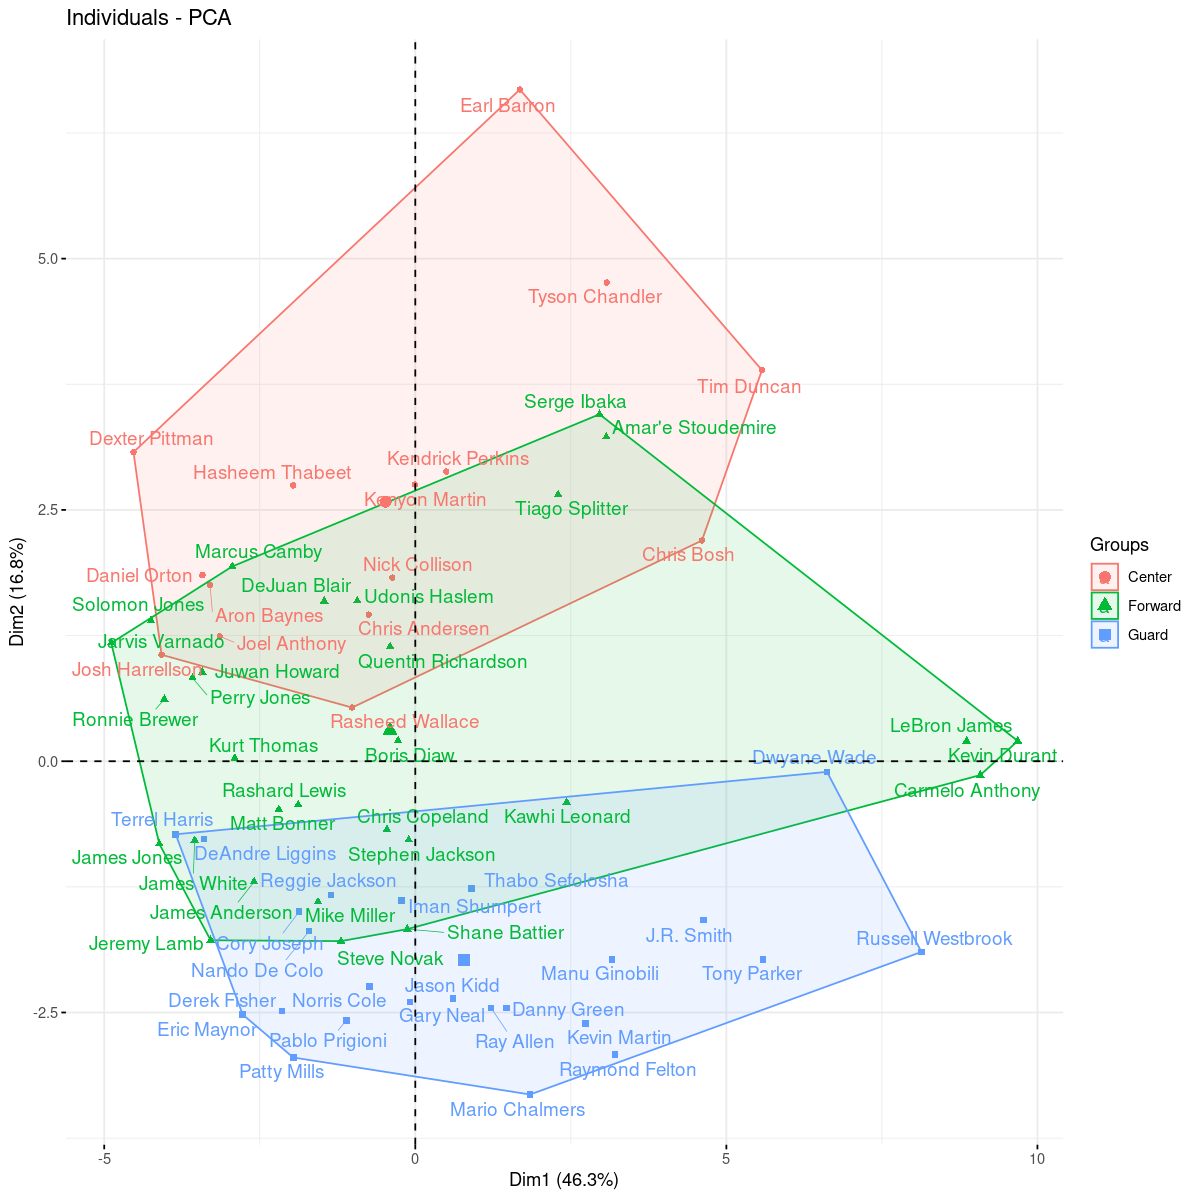

In [49]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_ind(res.pca, 
             repel = TRUE,
             axis = 2, 
             habillage = basket_data$Position,
             addEllipses=TRUE,
             ellipse.type="convex")  